In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import cg as CG

In [23]:
def norm_A(A,d):
    return np.dot(d, A.dot(d))

def cg(A, b, x0, iterations, tol = np.finfo(float).eps):
    
    x = x0.copy()
    r_old = b-A@x
    d = r_old
    for _ in range(iterations):
        
        alpha = np.dot(r_old,r_old)/norm_A(A,d)
        r_new = r_old - alpha * A@d
        x += alpha* d
        beta = -np.dot(r_new, r_new)/np.dot(r_old, r_old)
        d = r_new - beta*d

        if np.linalg.norm(r_new-r_old)<tol:
            break
        r_old = r_new
    
    return x

In [10]:
def create_SPD_matrix(n):
    R = np.random.randn(n,n)
    S = np.dot(R.T, R)
    SPD = S + 0.1 * np.eye(10)
    return SPD

In [18]:
A = create_SPD_matrix(10)
b = np.random.randn(10)
x0 = np.zeros(10)

In [33]:
TRUE_SOLUTION, trash = CG(A,b, x0=x0) # x0 = zeros90

In [40]:
np.linalg.norm(cg(A,b,x0, iterations=10)-TRUE_SOLUTION)

1.5319051247659572e-13

In [36]:
np.linalg.norm(CG(A,b,x0=x0, maxiter=2)[0]-TRUE_SOLUTION)

17.15654971849564

In [42]:
SCIPY_err = np.array([np.linalg.norm(CG(A,b,x0=x0, maxiter=i)[0]-TRUE_SOLUTION) for i in range(2,12)])
MY_err = np.array([np.linalg.norm(cg(A,b,x0, iterations=i)-TRUE_SOLUTION) for i in range(2,12)])


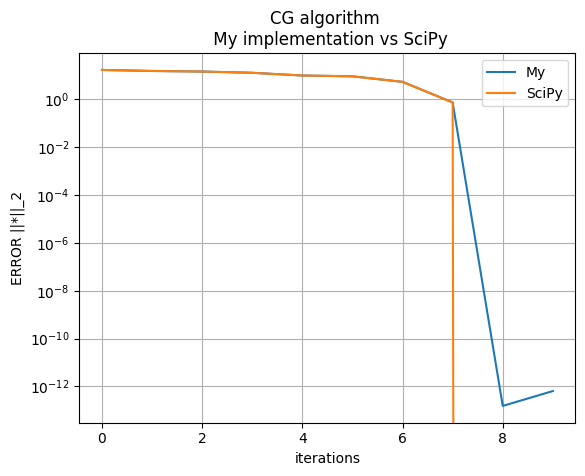

In [43]:
fig, ax = plt.subplots(1,1)
ax.plot(MY_err, label = 'My')
ax.plot(SCIPY_err, label = 'SciPy')
ax.set(yscale = 'log', ylabel = 'ERROR ||*||_2', xlabel = 'iterations',
       title = 'CG algorithm \n My implementation vs SciPy')
ax.grid()
ax.legend()